# Part II - Data Visualization of Ford Go-Bike System
## by Ebenezer Acquah

## Investigation Overview


> In this investigation, I perform univariate, bivariate, and multivariate analysis  on Ford Go-Bike system.  The main focus was to come up with a total of 15 visualizations from the dataset in order make deducations from the data.


## Dataset Overview

> This dataset provides information about individual rides made in a bike-sharing system in the San Francisco Bay Area. The dataset has 183412 rows and 16 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("/home/eben-success/Desktop/Local/Udacity/Udacity/Udacity_Data_Analysis_Projects/Project 3/201902-fordgobike-tripdata.csv")

## Data Wrangling and Feature Engineering

In [3]:
for col in ['start_station_id', 'end_station_id', 'member_birth_year', 'member_gender' , 'end_station_name', 'start_station_name']:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df['member_gender'] = df['member_gender'].fillna("Male")

In [4]:
# convert start_time and end_time to datetime format
df.start_time = pd.to_datetime(df. start_time)
df.end_time = pd.to_datetime(df.end_time)

# convert the start_station_id and end_stattion_id to strings
df.start_station_id = df.start_station_id.astype(str)

df.end_station_id = df.end_station_id.astype(str)

# convert the bike_id to string
df.bike_id = df.bike_id.astype(str)

# convert the user type and member_gender to categories
df.user_type = df.user_type.astype('category')

df.member_gender = df.member_gender.astype('category')

In [5]:
df['member_age'] = 2021 - df['member_birth_year']

# converting member age from float to int

df['member_age'] = df['member_age'].astype(int)

df.drop(columns=['member_birth_year'], inplace=True)

In [6]:
# Checking for ages abover 100 years
abnormal_ages = df.query('member_age > 100')
print("The number of members with ages greater than 100 are  ", abnormal_ages.shape[0])

The number of members with ages greater than 100 are   75


In [7]:
df = df[df['member_age'] < 100]

In [8]:
# Getting hours from start time
df['start_hour'] = df['start_time'] .dt.strftime('%H')

# Getting days from start time
df['start_day'] = df['start_time'] .dt.strftime('%A')

df['start_month'] = df['start_time'] .dt.strftime('%B')

In [9]:
df['duration_min'] = (df['duration_sec'] / 60)
df['duration_min'] = df['duration_min'].astype(int)

# Dropping the duration_sec columns

df.drop(['duration_sec'], axis=1, inplace=True)


## Univariate Data Analysis

> In the univariate process, I answer the following questions through visualizations of bar graph, histogram, boxplot and violinplot.

- Which age group rented the most bikes?
- Which day has the most trips?
- Which duration range occurs the most frequently?
- Who are the major users of the bikes? (Customers or Subscribers)

Most people rented bikes on the Thursday. The total amount of bikes rented on the Thursday was 35000. This is followed by Tuesday, which amount a total of over 31000 rentals. On Friday,  a total amout of approximately 29000 rentals were made. The least of the rentals were made on Sunday and Saturday.

<AxesSubplot:title={'center':'Distribution of Day with the most Trip'}, xlabel='start_day', ylabel='count'>

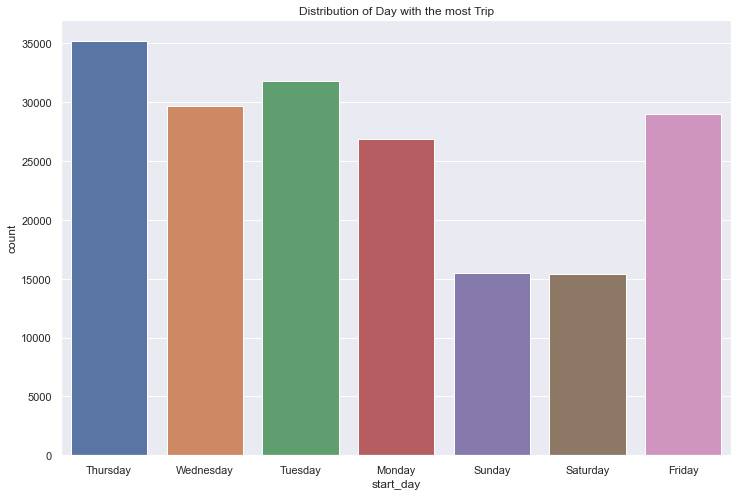

In [10]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title('Distribution of Day with the most Trip')
sn.countplot(df['start_day'])

Both male and females age ranges have the same median age

<AxesSubplot:title={'center':'Age Vs Gender Relationship'}, xlabel='member_gender', ylabel='member_age'>

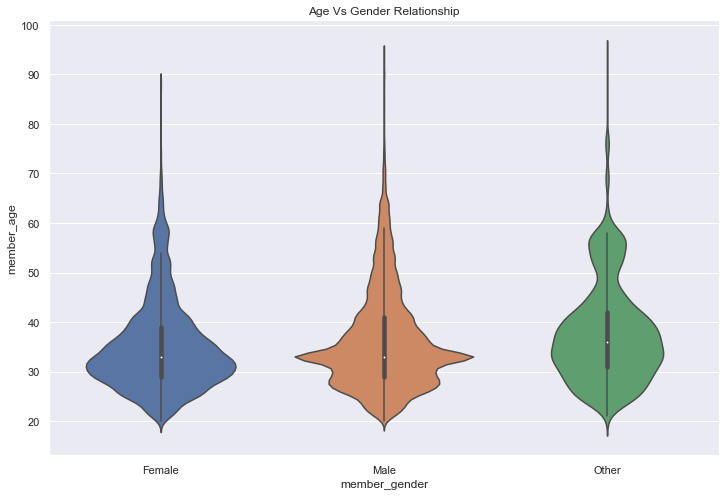

In [11]:
# Age range vs Gender

sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("Age Vs Gender Relationship")
sn.violinplot(data=df, x='member_gender', y='member_age')

We can see that majority of the users are subscribers. They account to a little above

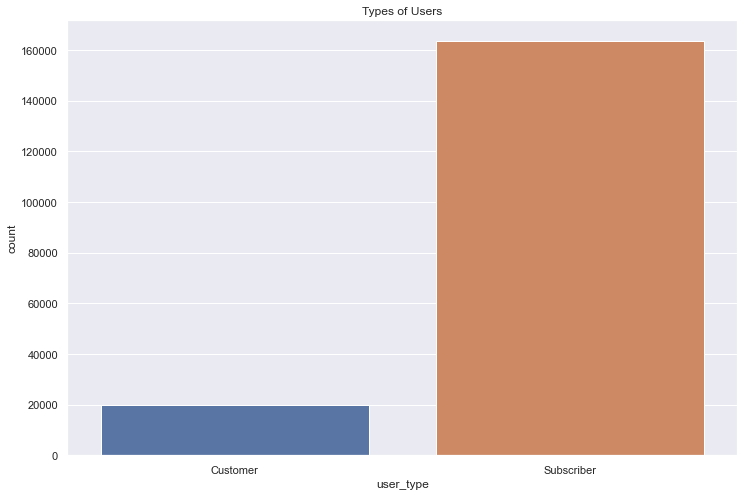

In [12]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title("Types of Users")
sn.countplot(df.user_type);

## Bivariate Data Analysis

>Similarly, in the bivariate process, I answer the following questions through visualizations of bar graph, histogram, boxplot and violinplot.

- Which day of the week has the most average trips duration?
- Which the trip duration of each age group?
- What isthe age range of different user types?
- What is the age range of different genders?


it can be deduced that most people hire bikes on the weekends (Sunday and Saturday).

<AxesSubplot:title={'center':'Duration of trips during the Weekday'}, xlabel='start_day', ylabel='duration_min'>

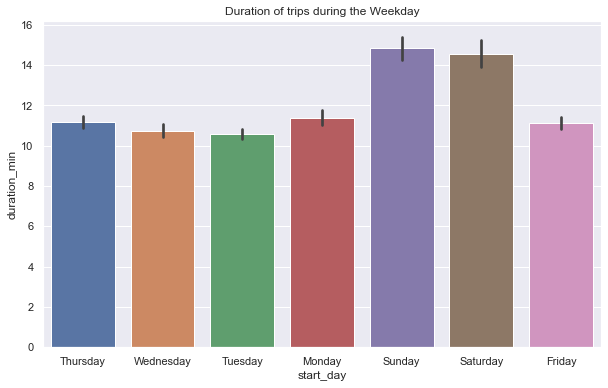

In [13]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[10,6])
plt.title("Duration of trips during the Weekday")
sn.barplot(data=df, x = 'start_day', y='duration_min')

Most age groups with largest average of trip duration are 21 and 77

<AxesSubplot:title={'center':'Trips Durations among Age Group'}, xlabel='member_age', ylabel='duration_min'>

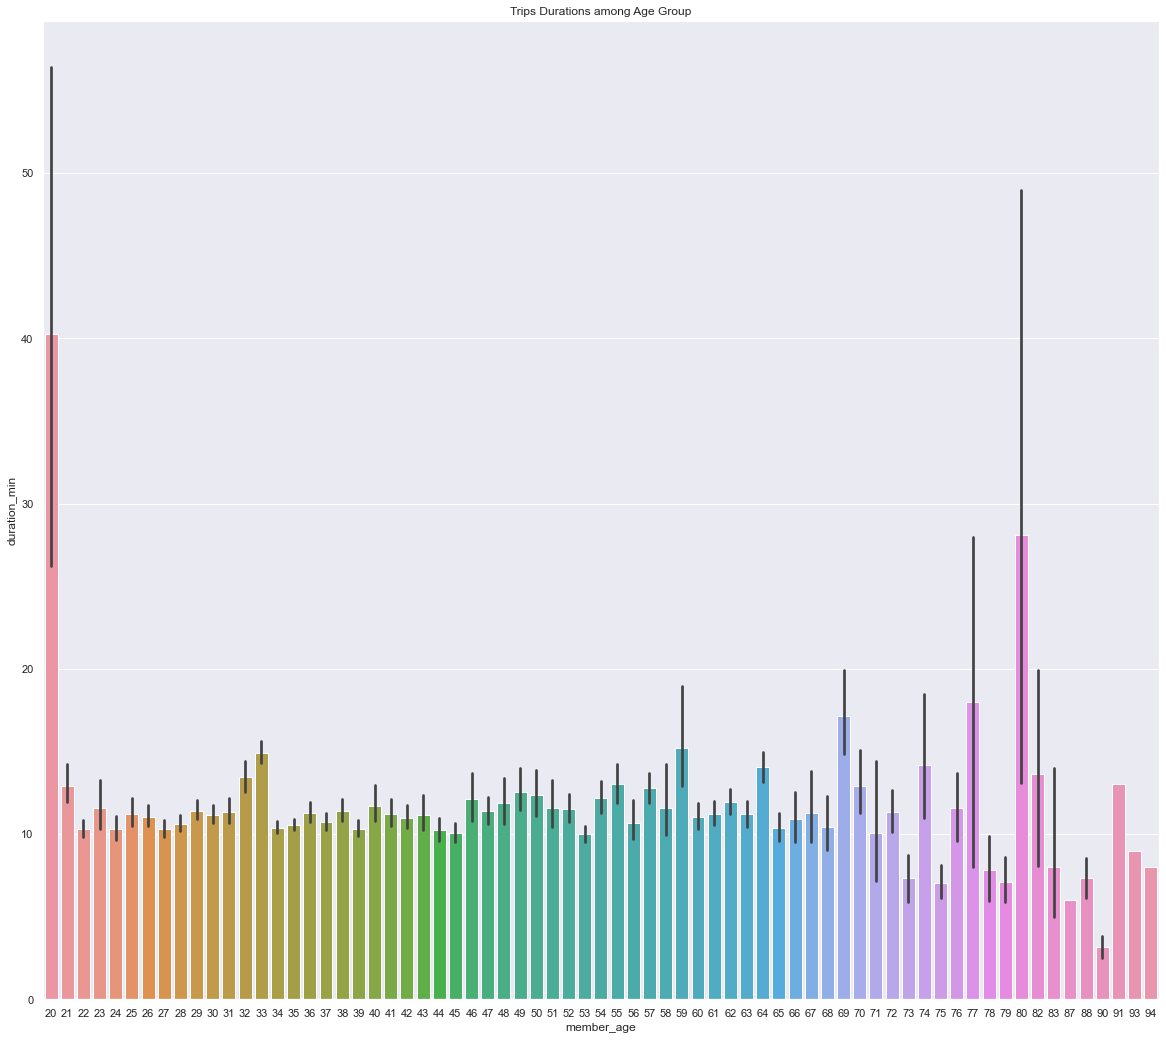

In [14]:
# Trip duration vs Age Group

sn.set_theme(style='darkgrid')
plt.figure(figsize=(20,18))
plt.title('Trips Durations among Age Group')
sn.barplot(data=df, x='member_age', y='duration_min')

Most the customers are between the ages of 30 and 39. While the age range of  majority of subscribers is 30 and 41 years. 

<AxesSubplot:title={'center':'Age Range Among Users'}, xlabel='user_type', ylabel='member_age'>

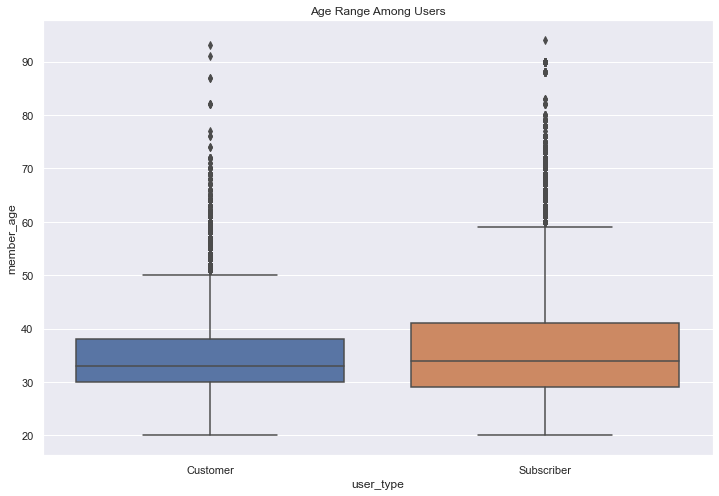

In [15]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("Age Range Among Users")
sn.boxplot(data=df, x='user_type', y='member_age')

## Multivariate Data Analysis
>Likewise, with the multivariate analysis, I found answers to the following questions through visualizations of bar graph, histogram, boxplot violinplot:
- What is the relationship between Weekdays, Average Duration and User Gender?
- Which gender have the most average trip duration among weekdays?
- Were there features that strengthened each other?
- Which user_type and member_gender took the most trip?



Most of the users who tok the rented the bikes from Monday to Sunday were males. 

<AxesSubplot:xlabel='start_day', ylabel='duration_min'>

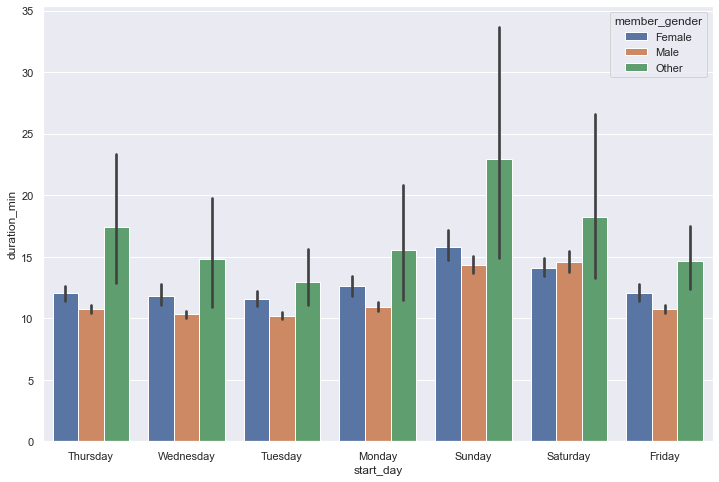

In [16]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
sn.barplot(data=df, y='duration_min', x='start_day', hue='member_gender')

Both customer and subscribers show similar trends for age and trip duration. However, there is a slight increase in that of the subscribers.

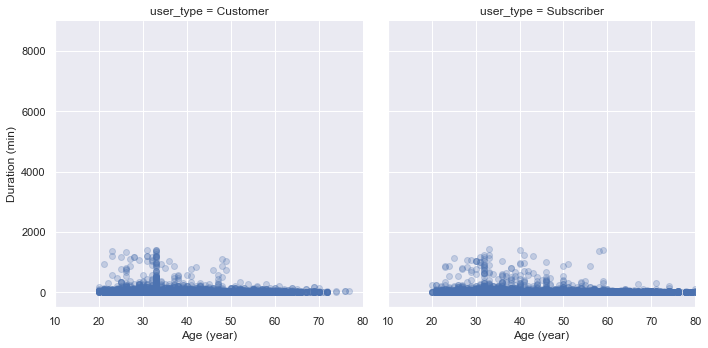

In [17]:
user_types = sn.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5, xlim = [10, 80], ylim = [-500, 9000])
user_types.map(plt.scatter, 'member_age', 'duration_min', alpha=0.25)
user_types.set_xlabels('Age (year)')
user_types.set_ylabels('Duration (min)')

"Other" gender have the largest median accross board.

<AxesSubplot:xlabel='start_day', ylabel='member_age'>

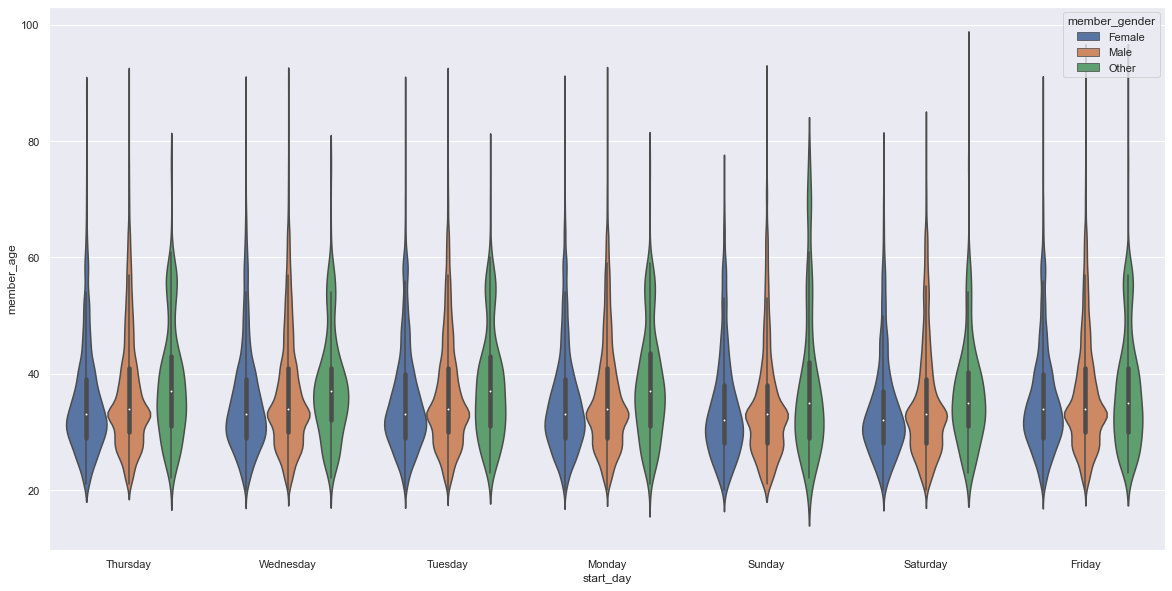

In [18]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=(20,10))
sn.violinplot(data=df, x='start_day', y='member_age', hue='member_gender')


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [21]:
# Use this command if you are running this file in local
!jupyter nbconvert  notebook_slide.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook notebook_slide.ipynb to slides
[NbConvertApp] Writing 973493 bytes to notebook_slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/notebook_slide.slides.html
Use Control-C to stop this server
^C

Interrupted


### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
